# Lecture des fichiers

## Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fastddm as fddm
from tqdm import tqdm
from fastddm.fit import simple_structure_function, fit
from fastddm.azimuthalaverage import AAReader

## Définition de la vidéo à lire

In [4]:
video = 45
date="data/2025-02-04/"
filename = date+"extracted/resized"+str(video)+".aa.ddm"

## Lecture

In [5]:
r = AAReader(filename)
aa = r.load()
q = aa.k
time = aa.tau

In [ ]:
type(aa)

fastddm.azimuthalaverage.AzimuthalAverage

In [ ]:
q.shape

(384,)

In [ ]:
time.shape

(499,)

In [ ]:
aa.data.shape

(384, 499)

## Définition des normes de vecteurs d'onde à afficher

In [6]:
test_k = np.array([40, 70, 100, 130], dtype=np.int64)

In [7]:
q[test_k]

array([1.82880894, 3.21704589, 4.60649606, 5.99594501])

## Affichage

100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


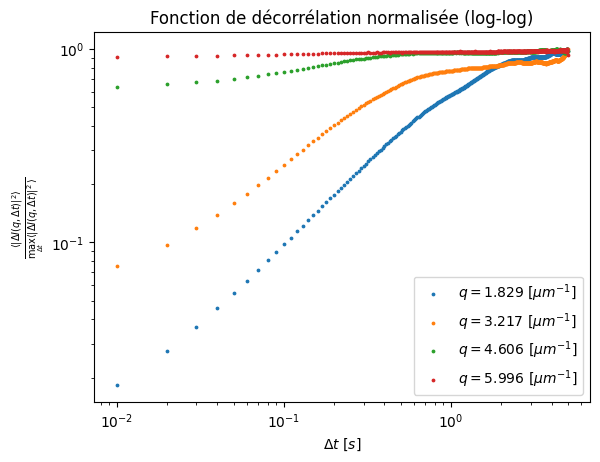

In [8]:
for tk in tqdm(test_k):    
    plt.scatter(time, aa.data[tk]/np.max(aa.data[tk]), marker="o", s=3, label="$q={:.3f}\ [\mu m^{{-1}}]$".format(q[tk]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$\Delta t\ [s]$")
plt.ylabel(r"$\frac{\langle|\Delta I(q,\Delta t)|^2 \rangle}{\max_{\Delta t}\langle|\Delta I(q,\Delta t)|^2 \rangle}$")
plt.title("Fonction de décorrélation normalisée (log-log)")
plt.legend()

100%|██████████| 4/4 [00:00<00:00, 102.31it/s]


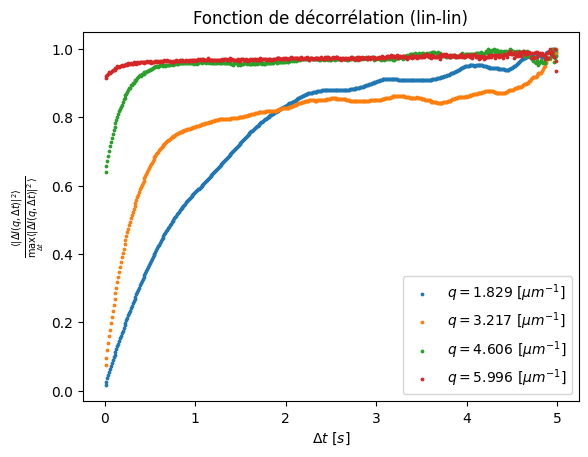

In [9]:
for tk in tqdm(test_k):    
    plt.scatter(time, aa.data[tk]/np.max(aa.data[tk]), marker="o", s=3, label="$q={:.3f}\ [\mu m^{{-1}}]$".format(q[tk]))
plt.xlabel("$\Delta t\ [s]$")
plt.ylabel(r"$\frac{\langle|\Delta I(q,\Delta t)|^2 \rangle}{\max_{\Delta t}\langle|\Delta I(q,\Delta t)|^2 \rangle}$")
plt.title("Fonction de décorrélation (lin-lin)")
plt.legend()

## Fit de quelques valeurs

In [10]:
simple_structure_function.set_param_hint("B", min=-np.inf, max=np.inf, value=0.0)
fit_time = np.logspace(-2, 0.7)
labelstr = r"$A = {A:.2f},\ B = {B:.2f},\ \tau = {tau:.2f}s$"
weights = 1/np.sqrt(aa.tau)

100%|██████████| 4/4 [00:00<00:00, 61.24it/s]


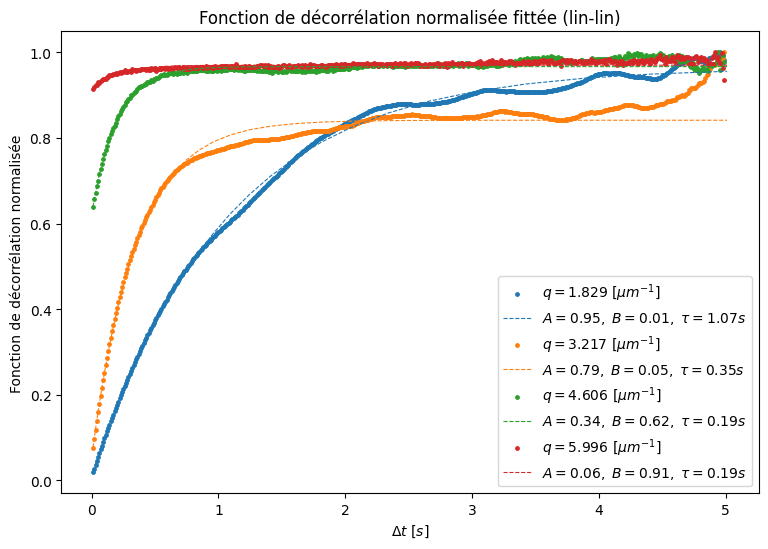

In [11]:
fig = plt.figure(figsize=(9, 6))
val = {}
for tk in tqdm(test_k):
    # fit for the given fixed index/k
    result = fit(simple_structure_function, xdata=aa.tau, ydata=aa.data[tk]/np.max(aa.data[tk]), weights=weights)
    val[tk]=result.best_values
    
    # plot original data
    plt.scatter(aa.tau, aa.data[tk]/np.max(aa.data[tk]), marker="o", s=6, 
                label="$q={:.3f}\ [\mu m^{{-1}}]$".format(q[tk]))
    
    # and the fit
    plt.plot(fit_time, simple_structure_function.eval(**result.best_values, dt=fit_time), linestyle="--", linewidth=0.8, label=labelstr.format(**result.best_values))

plt.xlabel("$\Delta t\ [s]$")
plt.ylabel("Fonction de décorrélation normalisée")
plt.title("Fonction de décorrélation normalisée fittée (lin-lin)")
plt.legend()

100%|██████████| 4/4 [00:00<00:00, 96.27it/s]


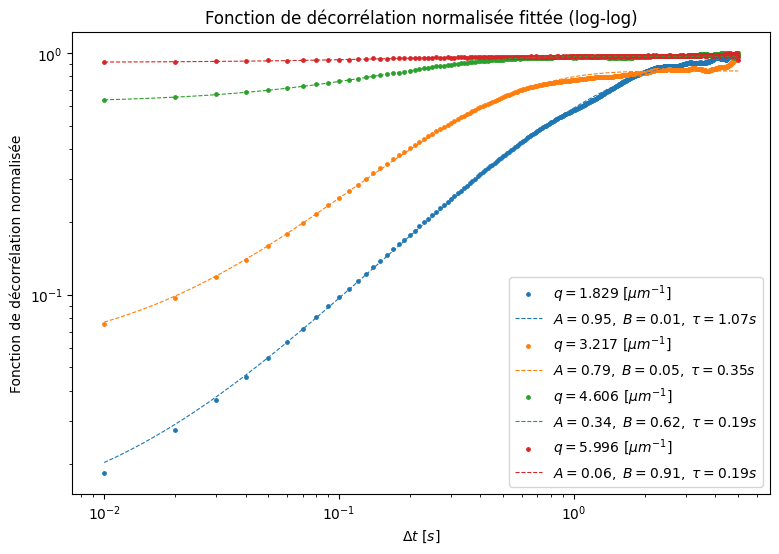

In [12]:
fig = plt.figure(figsize=(9, 6))
for tk in tqdm(test_k):
    plt.scatter(aa.tau, aa.data[tk]/np.max(aa.data[tk]), marker="o", s=6, 
                label="$q={:.3f}\ [\mu m^{{-1}}]$".format(q[tk]))

    plt.plot(fit_time, simple_structure_function.eval(**val[tk], dt=fit_time), linestyle="--", linewidth=0.8, label=labelstr.format(**val[tk]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\Delta t\ [s]$")
plt.ylabel("Fonction de décorrélation normalisée")
plt.title("Fonction de décorrélation normalisée fittée (log-log)")
plt.legend()

## Résidus

100%|██████████| 4/4 [00:00<00:00, 101.72it/s]


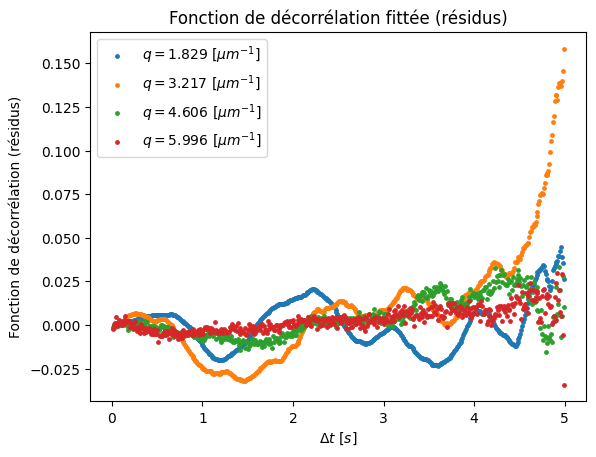

In [13]:
for tk in tqdm(test_k):    
    # plot original data
    plt.scatter(aa.tau, aa.data[tk]/np.max(aa.data[tk])-simple_structure_function.eval(**val[tk], dt=aa.tau), marker="o", s=6, 
                label="$q={:.3f}\ [\mu m^{{-1}}]$".format(q[tk]))
   
plt.xlabel("$\Delta t\ [s]$")
plt.ylabel("Fonction de décorrélation (résidus)")
plt.title("Fonction de décorrélation fittée (résidus)")
plt.legend()

## Fit complet

In [41]:
q_index = [35,100]

In [42]:
tau = []
for i in tqdm(range(q_index[0], q_index[1])):
    result = fit(simple_structure_function, xdata=aa.tau, ydata=aa.data[i]/np.max(aa.data[i]), weights=weights)
    tau.append(result.best_values["tau"])

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████| 65/65 [00:00<00:00, 150.26it/s]


In [43]:
x = q[q_index[0]:q_index[1]]
y = tau
x_th = np.linspace(np.min(x), np.max(x), 100)

In [ ]:
x.shape

(95,)

In [ ]:
len(y)

95

In [44]:
y=np.array(y)
x=np.array(x)
x = x[y>1e-3]
y=y[y>1e-3]


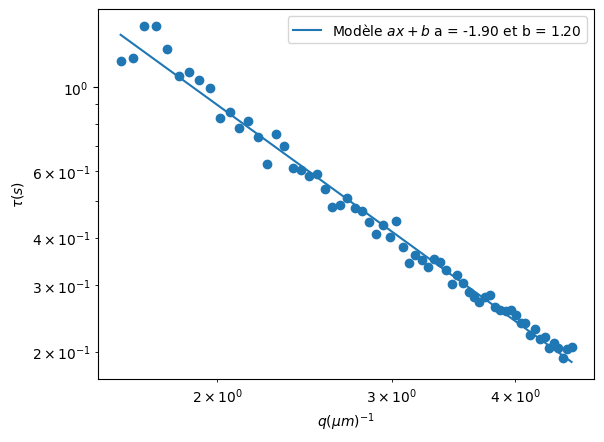

In [45]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y)
plt.xlabel(r"$q (\mu m)^{-1}$")
plt.ylabel(r"$\tau (s)$")
a, b = np.polyfit(np.log(x), np.log(y), 1)
plt.plot(x_th, np.exp(a*np.log(x_th) + b), label=f"Modèle $ax+b$ a = {a:.2f} et b = {b:.2f}")
plt.legend()

## Résidus

# Coefficient de diffusion

In [46]:
D = np.exp(-b)*1e-12 # en m2/s
print(D)

2.9988131233496346e-13


In [47]:
T = 238

In [48]:
a = 345e-9/2

In [49]:
import scipy.constants as c

In [50]:
eta = c.Boltzmann*T/(6*np.pi*D*a)
print(eta)


0.0033699279413458736
